## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon May  1 13:30:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)
%cd /content/drive/MyDrive/Sem-VI/Exp2

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
%cd /content/drive/MyDrive/Sem-VI/Exp2

from ultralytics import YOLO

from IPython.display import display, Image

/content/drive/MyDrive/Sem-VI/Exp2


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd /content/drive/MyDrive/ppe-detection
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

In [ ]:
%mkdir /content/drive/MyDrive/Sem-VI/Exp2/datasets
%cd /content/drive/MyDrive/Sem-VI/Exp2/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ovEadVpHdxTS0IOKDsxy")
project = rf.workspace("ppe-detection-khsge").project("ppe-a6gr5")
dataset = project.version(1).download("yolov8")

/content/drive/MyDrive/Sem-VI/Exp2/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=8371f9e4d12c55a0caeb745c36f0dc53607ab44371739b3dbaa1c49e6e4f1678
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installat

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to ppe-1 in yolov8:: 100%|██████████| 5566/5566 [00:35<00:00, 156.20it/s]


## Custom Training

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/Sem-VI/Exp2/datasets/ppe-1/data.yaml epochs=100 imgsz=800 plots=True

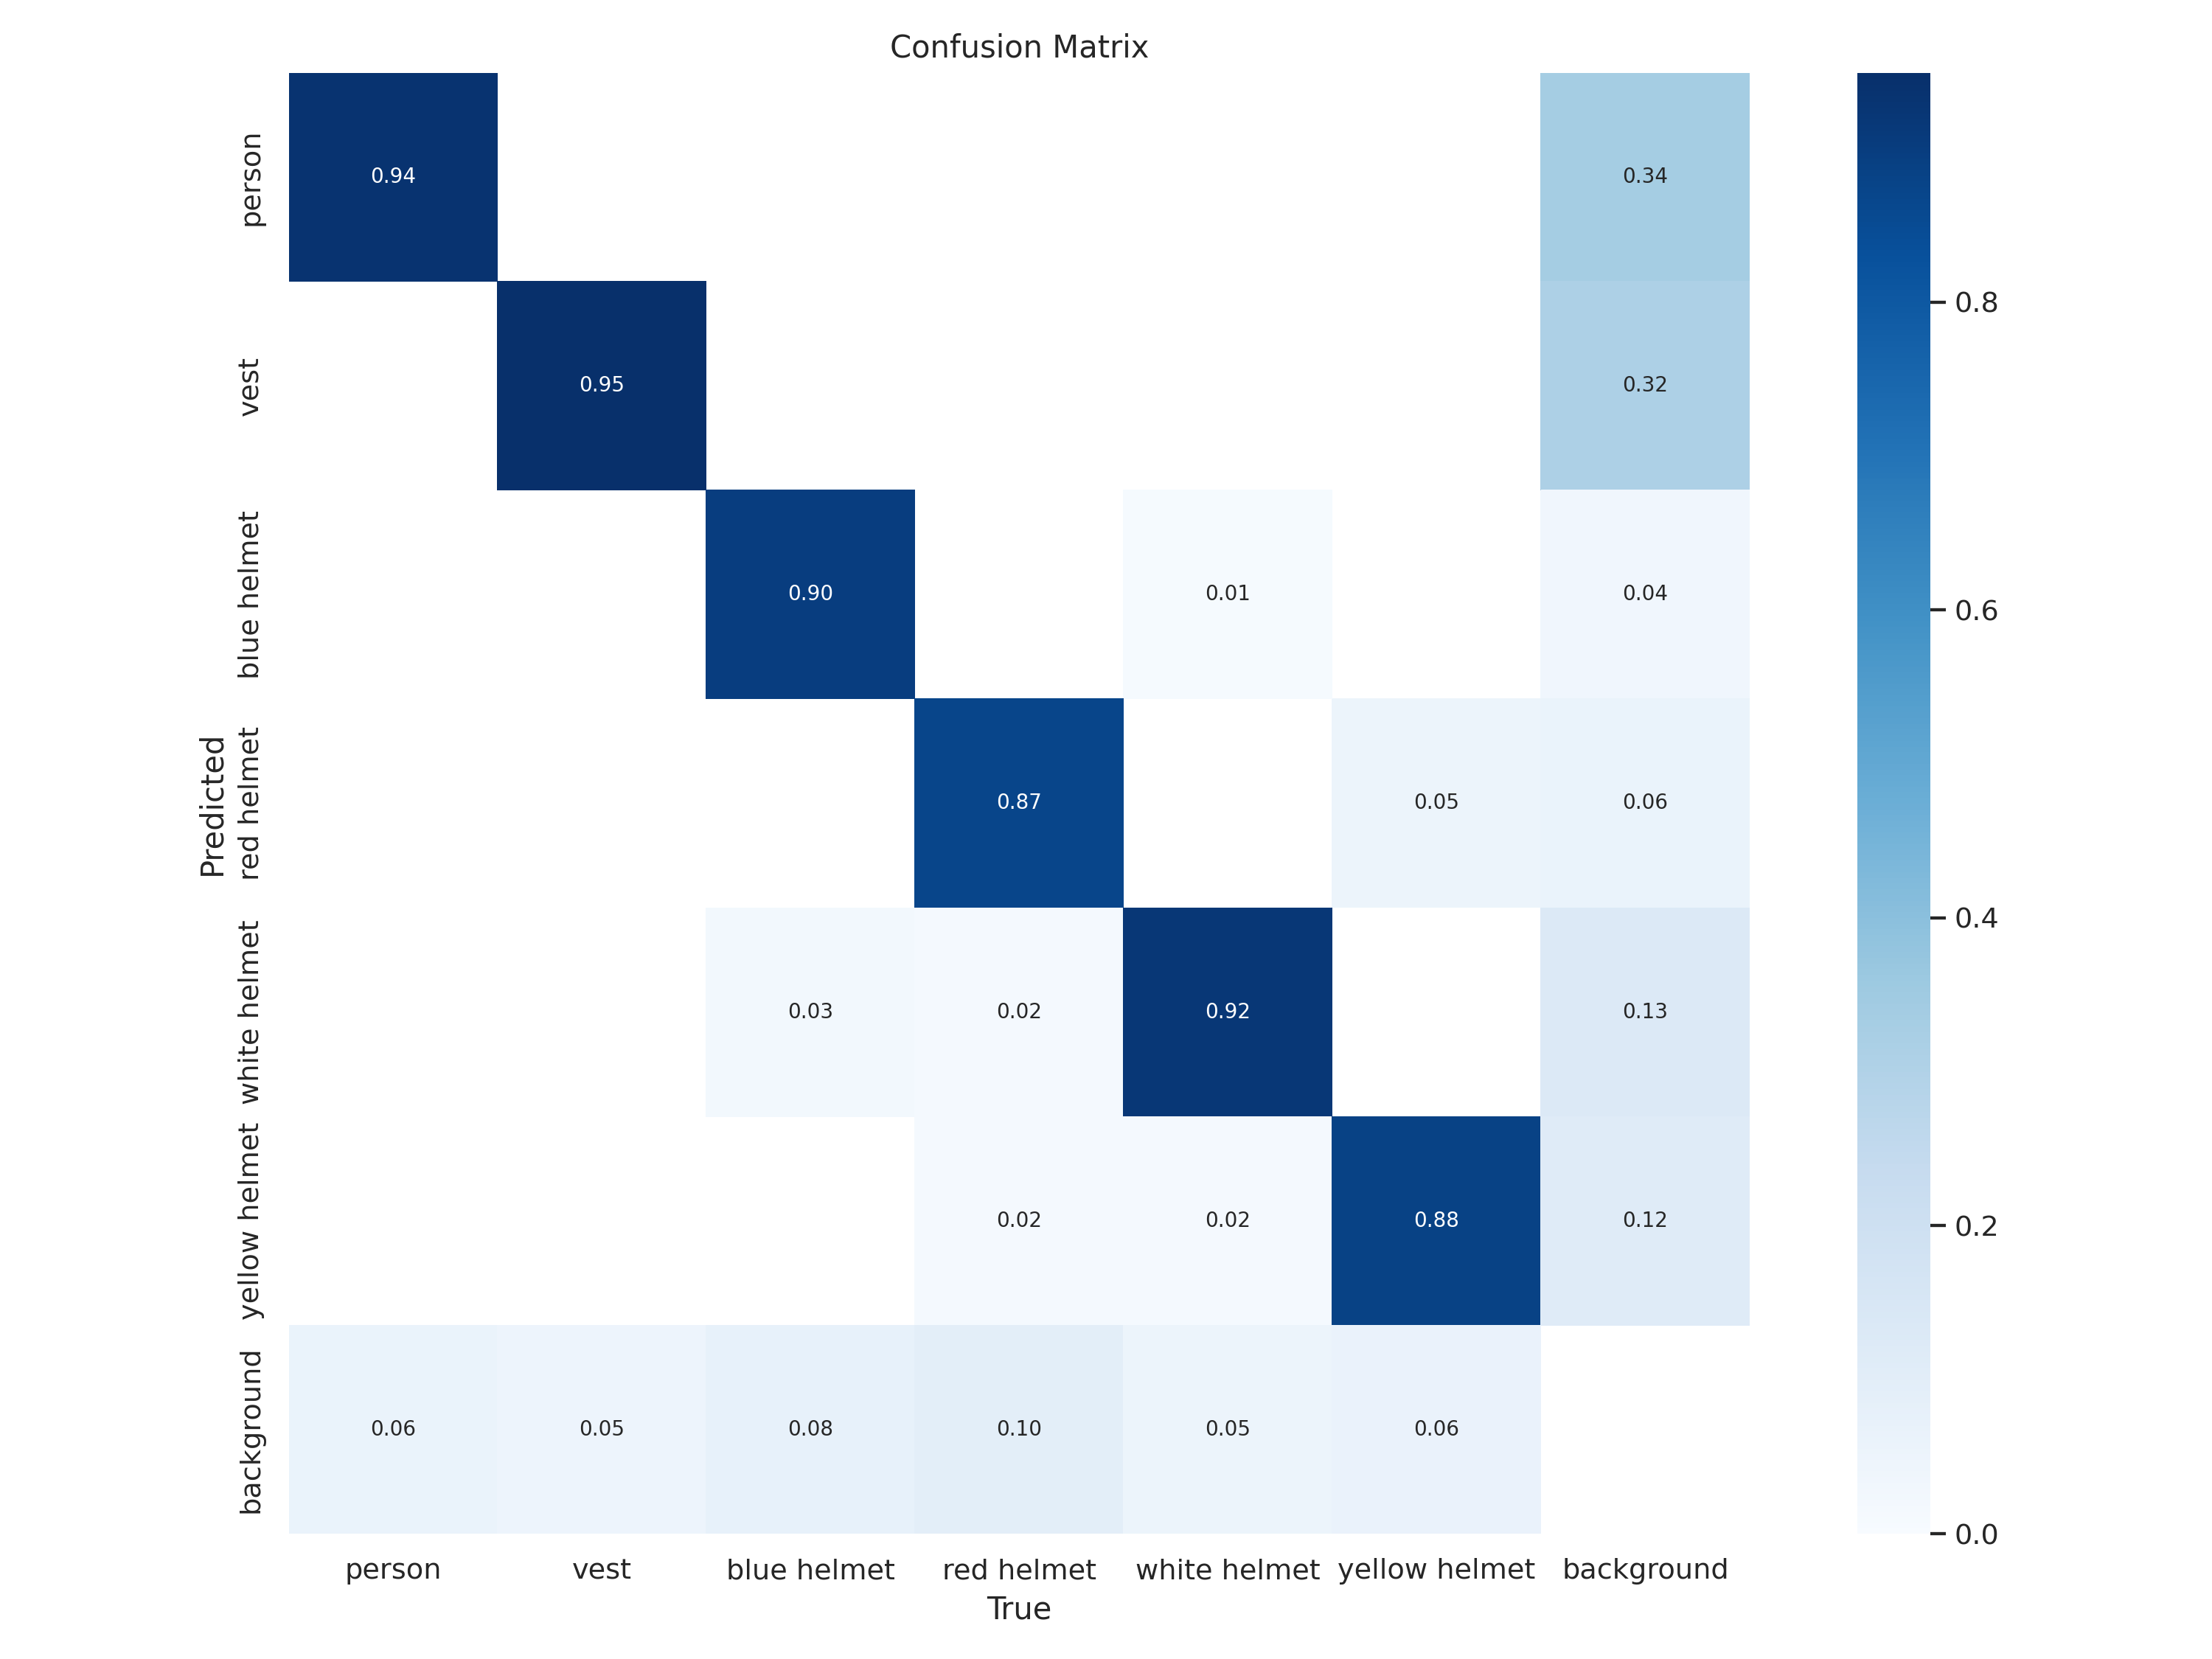

In [ ]:
Image(filename=f'/content/drive/MyDrive/Sem-VI/Exp1/PPE-data/runs/detect/train3/confusion_matrix.png', width=1200)

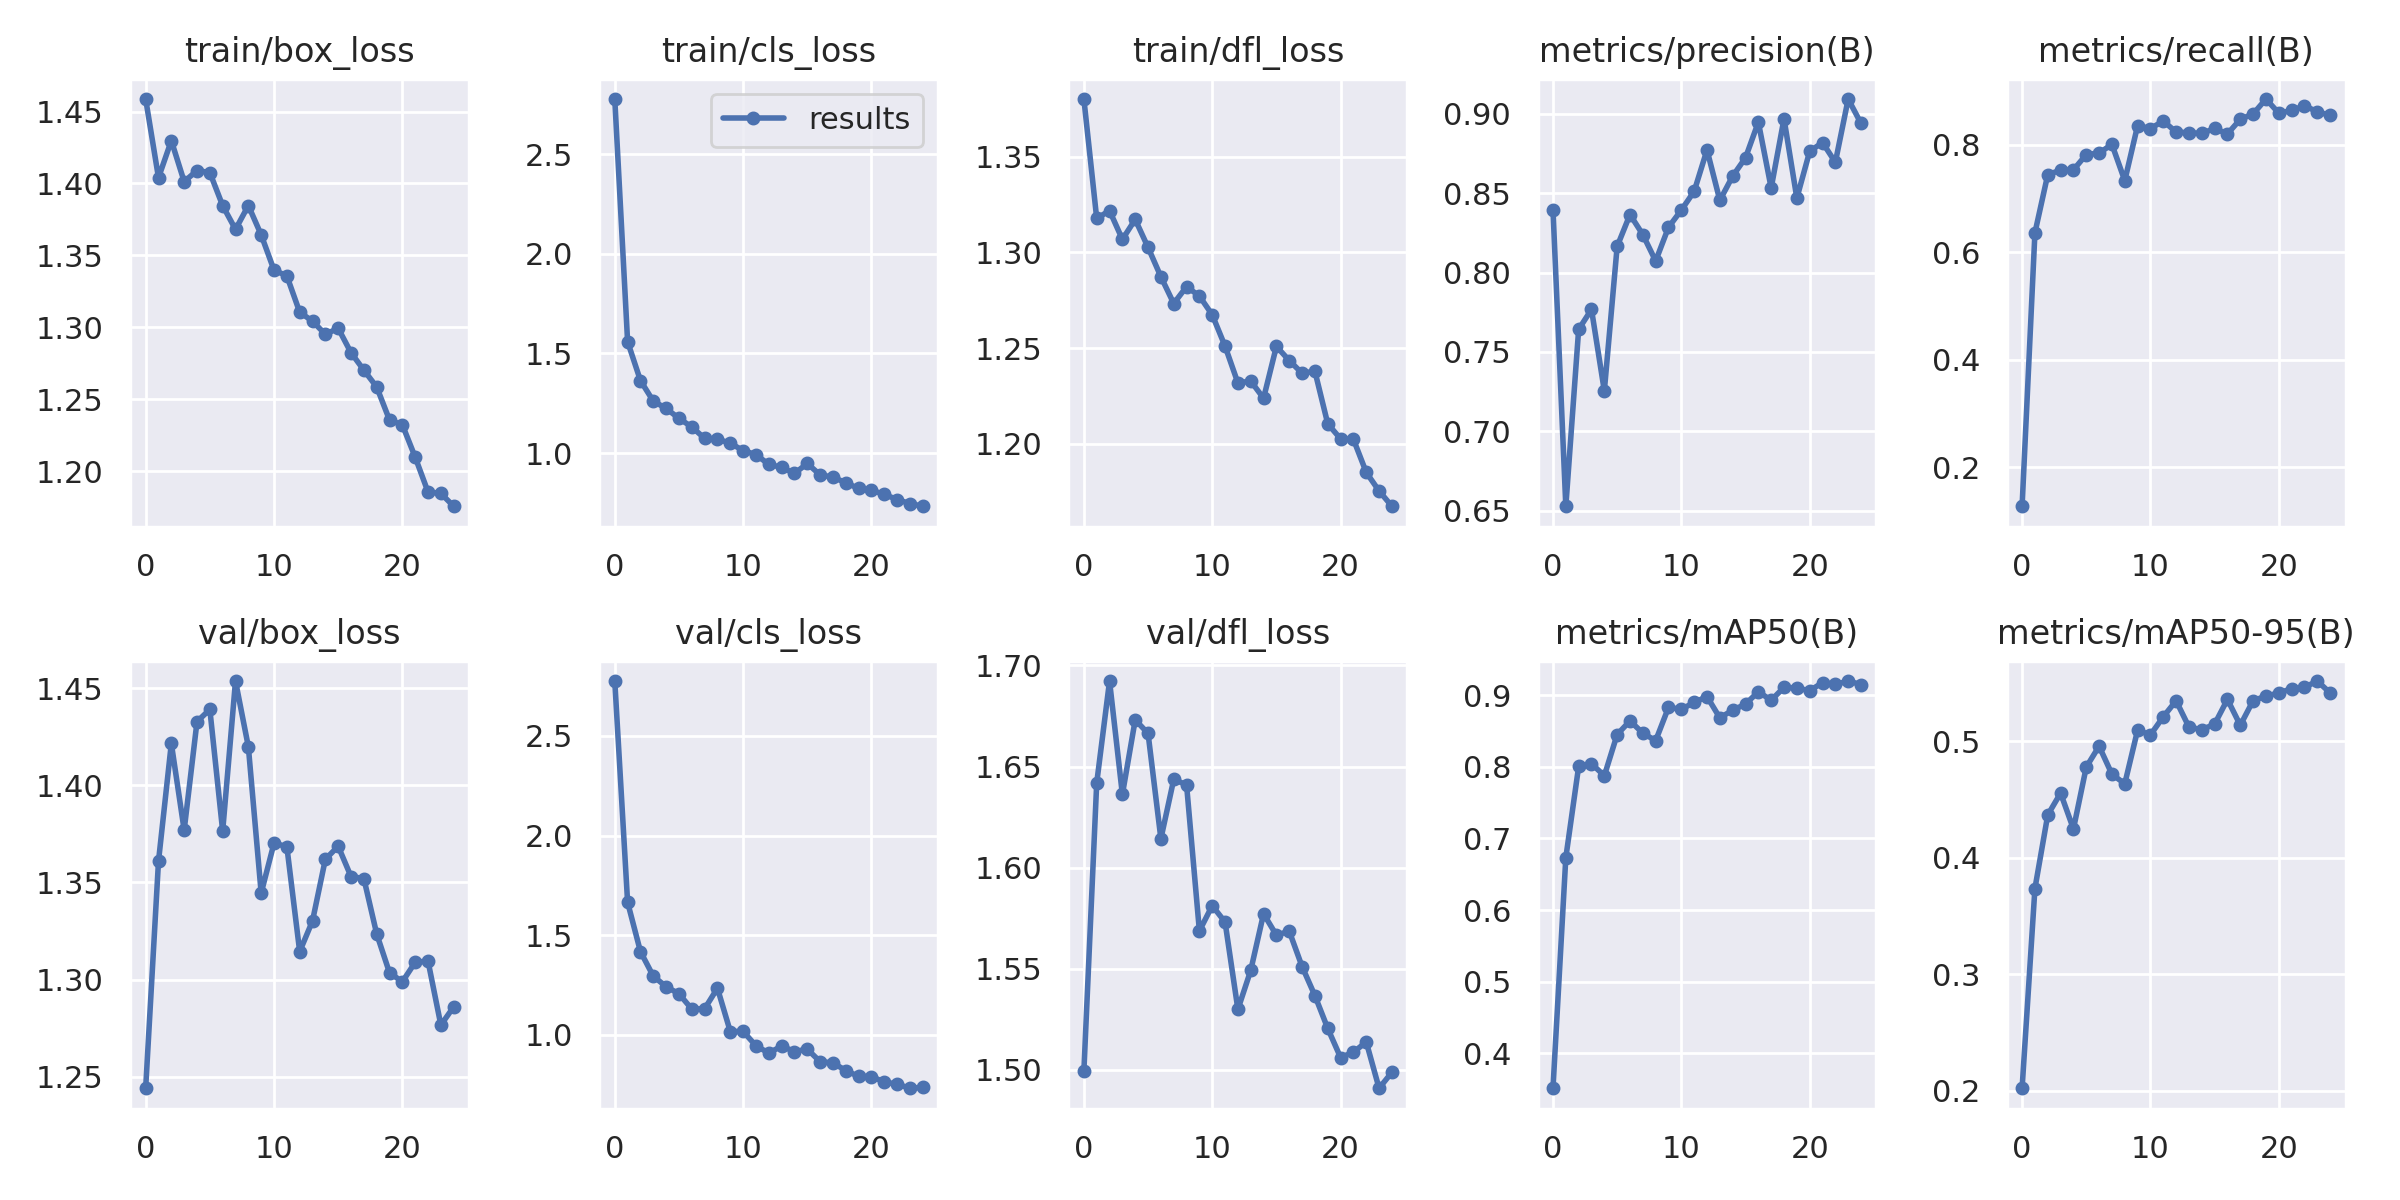

In [ ]:
Image(filename=f'/content/drive/MyDrive/Sem-VI/Exp1/PPE-data/runs/detect/train3/results.png', width=1200)

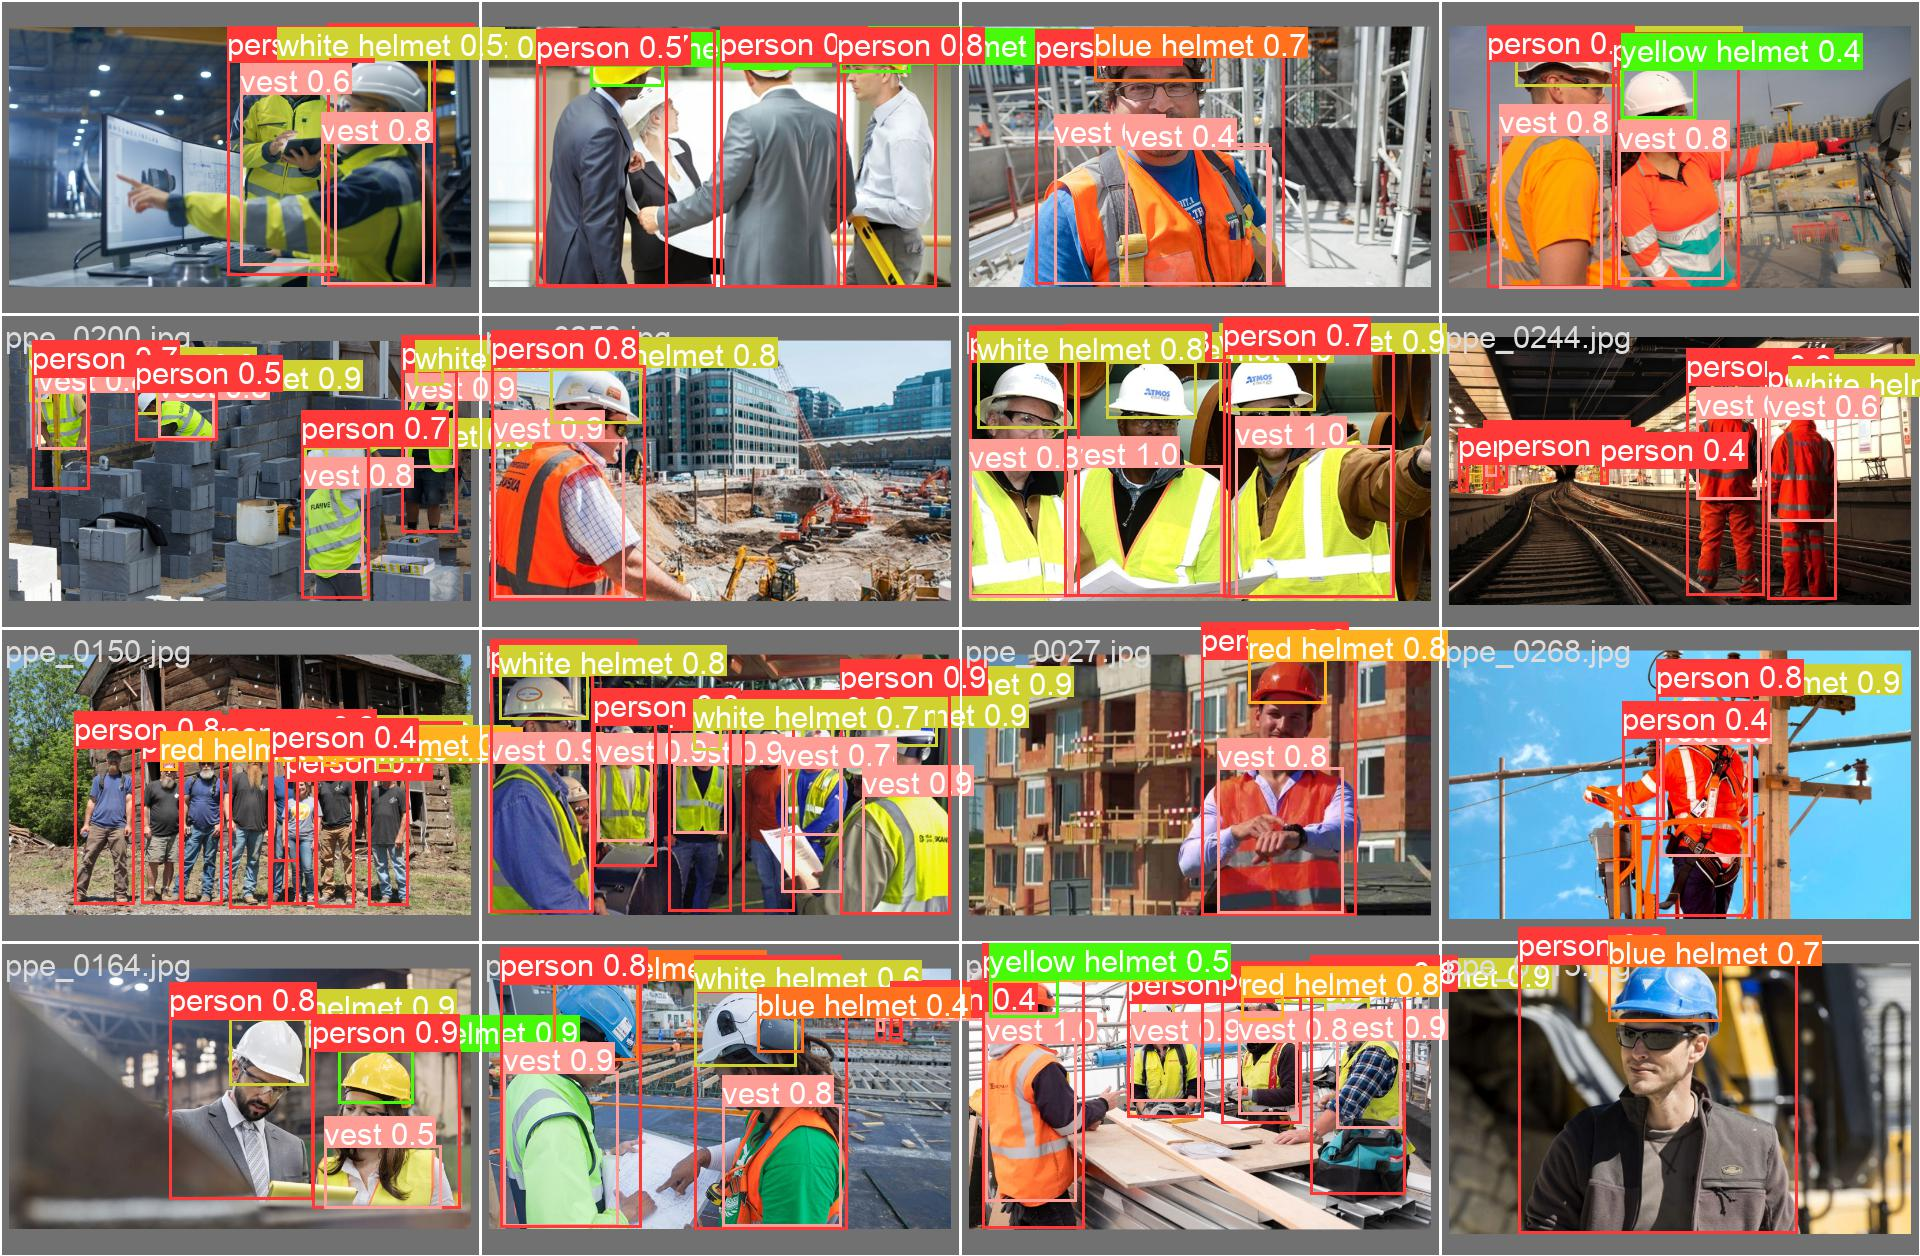

In [ ]:
Image(filename=f'/content/drive/MyDrive/Sem-VI/Exp1/PPE-data/runs/detect/train3/val_batch1_pred.jpg', width=1200)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/ppe-detection/datasets/runs/detect/train7/weights/best.pt data=/content/drive/MyDrive/ppe-detection/datasets/Capacetes-e-Cones-6/data.yaml

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Sem-VI/Exp2/datasets/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Sem-VI/Exp1/PPE-data/test/images/ save=True

2023-05-01 13:35:27.931297: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 13:35:29.115353: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs
image 1/30 /content/drive/MyDrive/Sem-VI/Exp1/PPE-data/test/images/ppe_0300.jpg: 448x800 3 NO-Hardhats, 1 NO-Safety Vest, 2 Persons, 2 Safety Cones, 56.4ms
image 2/30 /content/drive/MyDrive/Sem-VI/Exp1/PPE-data/test/images/ppe_0301.jpg: 544x800 3 Hardhats, 3 NO-Masks, 3 Persons, 1 Safety Vest, 53.5ms
image 3/30 /content/drive/MyDrive/Sem-VI/Exp1/PPE-data/test/images/ppe_0302.jpg: 512x800

In [ ]:
yolo task=detect mode=predict model=best.pt conf=0.25 source= http://192.168.0.100:8080

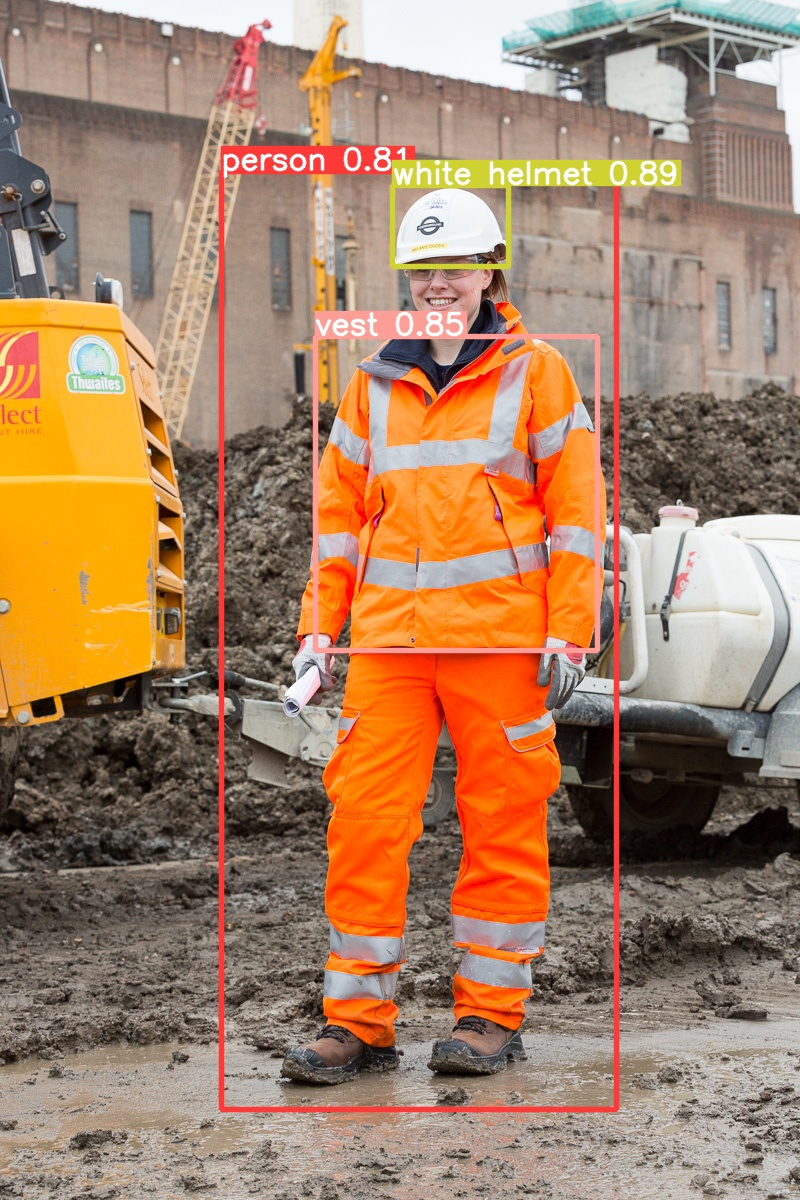

In [ ]:
Image(filename=f'/content/drive/MyDrive/Sem-VI/Exp1/PPE-data/runs/detect/predict/ppe_0307.jpg', width=800)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/MyDrive/Sem-VI/Exp1/PPE-data/runs/detect/predict2/PexelsVideo.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred